In [ ]:
import numpy as npa
import pandas as pd

# Mount do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lê arquivo CSV e transforma em DataFrame
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/attacks_balanced.csv", encoding="ISO-8859-1")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-jun.-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-jun.-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-jun.-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-jun.-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-jun.-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [ ]:
# Número de linhas/colunas
df.shape

(25723, 24)

In [ ]:
# Checa casos de valores nulos
df.isnull().sum()

,0
Case Number,17021
Date,19421
Year,19423
Type,19425
Country,19471
Area,19876
Location,19962
Activity,19967
Name,19631
Sex,19986


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5756 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3468 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             6302 non-null   object 
 13  Time                    2944 non-null   object 
 14  Species                 3458 non-null 

In [ ]:
# Remove colunas desnecessárias / vazias
df.drop(["Unnamed: 22", "Unnamed: 23", "Case Number", "Date", "Year", "Area", "Location", "Name", "Injury",
         "Investigator or Source", "pdf", "href formula", "href",
         "Case Number.1", "Case Number.2", "Time", "original order"], axis=1, inplace=True)

In [ ]:
df.head()

,Type,Country,Activity,Sex,Age,Fatal (Y/N),Species
0,Boating,USA,Paddling,F,57,N,White shark
1,Unprovoked,USA,Standing,F,11,N,NaN
2,Invalid,USA,Surfing,M,48,N,NaN
3,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,2 m shark
4,Provoked,MEXICO,Free diving,M,NaN,N,"Tiger shark, 3m"


In [ ]:
df.columns = ["Type", "Country", "Activity", "Sex", "Age", "Fatal", "Species"]

In [ ]:
# Remove linhas/colunas com valores vazios
df = df.dropna(how="any")

In [ ]:
# Mostra os diferentes tipos de espécies
df['Species']


,Species
0,White shark
6,Tiger shark
7,"Lemon shark, 3'"
8,"Bull shark, 6'"
10,Grey reef shark
...,...
6239,"""A pack of sharks"""
6242,Bull shark
6243,Bull shark
6265,Bull shark


In [ ]:
import re
import string

def normalize_text(text):
    # 1. Converter o texto para minúsculas, remover dígitos, pontuação (exceto apóstrofos dentro de palavras) e substituir quebras de linha
    text = re.sub(r'\n|[^\w\s\'-]|(\d)', ' ', text.lower())

    # 2. Corrigir contrações como "it's" -> "its" e "I'm" -> "im"
    text = re.sub(r"(\w)'(\w)", r"\1\2", text)

    # 3. Reduzir caracteres consecutivos e remover palavras curtas
    text = ' '.join([re.sub(r'(.)\1{1,}', r'\1\1', word) for word in text.split() if len(word) > 1])

    return text

In [ ]:
# Aplica normalização no campo das espécies
df["Species"] = df["Species"].apply(normalize_text)

In [ ]:
df["Species"]

,Species
0,white shark
6,tiger shark
7,lemon shark
8,bull shark
10,grey reef shark
...,...
6239,pack of sharks
6242,bull shark
6243,bull shark
6265,bull shark


In [ ]:
# Remover depois!
df = df[df["Country"] == "USA"]

	- Filtrar linhas com “shark” e sufixo
	- Filtrar linhas com prefixo e “shark”
	- Agrupar linhas que contenham: “no involvement”, “not confirmed”, “unidentified” como “unknown”
	- Remover as palavras “to”, “m”, “kg”, “small”, “cm”
	- Se contiver “or”, dividir a string por ele e refazer as verificações para ambas as partes

In [ ]:
# Listar termos mais comuns no campo de espécies
from collections import Counter
Counter(" ".join(df["Species"]).split()).most_common(100)

[('shark', 886),
 ('to', 414),
 ('white', 142),
 ('tiger', 79),
 ('blacktip', 65),
 ('bull', 60),
 ('involvement', 58),
 ('not', 50),
 ('confirmed', 47),
 ('or', 41),
 ('spinner', 39),
 ('possibly', 32),
 ('small', 31),
 ('nurse', 28),
 ('was', 23),
 ('hammerhead', 21),
 ('prior', 19),
 ('invalid', 17),
 ('lemon', 16),
 ('death', 16),
 ('involve', 15),
 ('by', 15),
 ('the', 15),
 ('sand', 14),
 ('juvenile', 13),
 ('-lb', 13),
 ('thought', 10),
 ('reef', 10),
 ('tooth', 10),
 ('incident', 10),
 ('unidentified', 10),
 ('questionable', 9),
 ('species', 9),
 ('cm', 9),
 ('identified', 9),
 ('mako', 8),
 ('sandtiger', 8),
 ('blue', 8),
 ('in', 8),
 ('on', 8),
 ('but', 7),
 ('no', 6),
 ('sandbar', 6),
 ('recovered', 6),
 ('dr', 6),
 ('said', 5),
 ('of', 5),
 ('sharks', 5),
 ('sevengill', 4),
 ('reported', 4),
 ('fragment', 4),
 ('seen', 4),
 ('feet', 3),
 ('that', 3),
 ('from', 3),
 ('bite', 3),
 ('grey-colored', 3),
 ('local', 3),
 ('days', 3),
 ('vicinity', 3),
 ('caught', 3),
 ('doubtful'

In [ ]:
import re

def clean_species(species):
    # Trata valores NaN ou casos vazios
    if not species or not isinstance(species, str):
        return "unknown"

    # Normaliza a string
    species = species.lower().strip()

    # Define palavras indesejadas e as remove usando regex
    unwanted_words = r'\b(to|m|kg|small|cm|thought|possibly|probably|said|reported|speculated|identified|recovered|fragment|very|with|by|in|on|and|a|an|the|other|or)\b'
    species = re.sub(unwanted_words, '', species)
    species = re.sub(r'\s+', ' ', species).strip()  # Remove espaços extras

    # Verifica casos "unknown" (desconhecido)
    unknown_keywords = ["no involvement", "not confirmed", "unidentified", "identity questionable", "unknown"]
    if any(keyword in species for keyword in unknown_keywords):
        return "unknown"

    # Se "or" existir, divide e processa cada parte
    if " or " in species:
        parts = species.split(" or ")
        processed_parts = [clean_species(part) for part in parts]
        return ", ".join(sorted(set(processed_parts)))  # Remove duplicatas e ordena os resultados

    # Extrai espécies se contiver "shark"
    if "shark" in species:
        match = re.search(r'(\b\w+\b)\s*shark|\bshark\s*(\b\w+\b)', species)
        if match:
            prefix = match.group(1) or ""
            suffix = match.group(2) or ""
            result = f"{prefix} shark".strip() if prefix else f"{suffix} shark".strip()
            return result

    # Valor padrão: retorna "unknown" se nenhuma informação significativa for encontrada
    return "unknown"

def process_species_column(df, column_name):
    # Aplica a lógica de limpeza a uma coluna especificada no DataFrame
    df[column_name] = df[column_name].fillna("").apply(clean_species)
    return df

# Exemplo de uso
df = process_species_column(df, "Species")

# Exibe o resultado
df

<ipython-input-96-b59a67a10d34>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].fillna("").apply(clean_species)


,Type,Country,Activity,Sex,Age,Fatal,Species
0,Boating,USA,Paddling,F,57,N,white shark
7,Unprovoked,USA,Fishing,M,52,N,lemon shark
8,Unprovoked,USA,Walking,M,15,N,bull shark
25,Unprovoked,USA,Body boarding,M,29,N,unknown
35,Unprovoked,USA,Stand-Up Paddleboarding,M,25,N,tiger shark
...,...,...,...,...,...,...,...
5571,Unprovoked,USA,Swimming,M,15,Y,unknown
5598,Unprovoked,USA,Fishing (Seining),M,15,Y,white shark
5806,Invalid,USA,Bathing,M,18,Y,involvement shark
6200,Unprovoked,USA,Shark tagging,F,21,Y,blacktip shark


In [ ]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/attacks-formated.csv', index=False)

In [ ]:
# Agora que o filtro de país foi feito, remove o campo para melhor fitting das colunas.
df.drop("Country", axis=1, inplace=True)

<ipython-input-98-b8c316d53c49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Country", axis=1, inplace=True)


In [ ]:
# Lista todos os tipos de atividade
all_activities = df['Activity'].unique()

all_activities

array(['Paddling', 'Fishing', 'Walking', 'Body boarding',
       'Stand-Up Paddleboarding', 'Surfing', 'Spearfishing', 'Snorkeling',
       'SUP', 'Swimming', 'Kayaking', 'Touching a shark', 'Floating',
       'Wading', 'SUP Foil boarding', 'Lobstering', 'Kite surfing',
       'Floating in tube', 'Standing', 'Teasing a shark',
       'Paddle boarding', 'Kayak Fishing', 'Treading water',
       'Playing in the water', 'Boogie boarding', 'Playing',
       'Attempting to rescue a shark', 'Photographing the shark',
       'Standing / Snorkeling', 'Shark fishing',
       'Swimming after falling overboard', 'Standing in inner tube',
       'Body surfing', 'Tagging sharks', 'Kiteboarding', 'Diving',
       'Casting a net', 'Marathon swimming', 'Boogie Boarding',
       'Fishing for sharks', 'Playing in the surf',
       'Swimming or boogie boarding', 'Free diving',
       'Sitting in the water', 'Kayaking / Fishing', 'Kite Surfing',
       'Scuba diving', 'Measuring sharks', 'Wade Fishing', '

In [ ]:
def normalize_activity(text):
    if "/" in text:
        text = text.split("/")[0].strip()
        return text

    else:
        return text

In [ ]:
df["Activity"] = df["Activity"].apply(normalize_activity)

In [ ]:
import re
import numpy as np

activity_mapping = {
    'Paddling': 'Paddling',
    'Fishing': 'Fishing',
    'Walking': 'Walking',
    'Body boarding': 'Bodyboarding',
    'Body surfing': 'Body Surfing',
    'Boogie Boarding': 'Boogie Boarding',
    'Stand-Up Paddleboarding': 'Stand-Up Paddleboarding',
    'SUP': 'Stand-Up Paddleboarding',
    'Surfing': 'Surfing',
    'Spearfishing': 'Spearfishing',
    'Snorkeling': 'Snorkeling',
    'Swimming': 'Swimming',
    'Kayaking': 'Kayaking',
    'Touching a shark': 'Touching a shark',
    'Floating': 'Floating',
    'Wading': 'Wading',
    'Lobstering': 'Lobstering',
    'Kite surfing': 'Kite Surfing',
    'Standing': 'Standing',
    'Teasing a shark': 'Teasing a shark',
    'Kayak Fishing': 'Kayak Fishing',
    'Playing': 'Playing',
    'Attempting to rescue a shark': 'Attempting to rescue a shark',
    'Photographing the shark': 'Photographing the shark',
    'Shark fishing': 'Shark Fishing',
    'Scuba diving': 'Scuba Diving',
    'Tagging sharks': 'Tagging sharks',
    'Casting a net': 'Casting a net',
    'Playing in the surf': 'Playing in the surf',
    'Jet skiing': 'Jet Skiing',
    'Jumping': 'Jumping',
    'Wade Fishing': 'Wade Fishing',
    'Treading water': 'Treading Water',
    'Surfing, paddling seawards': 'Surfing',
    'Kiteboarding': 'Kiteboarding',
    'Swimming, wearing black wetsuit & swim fins': 'Swimming',
    'Walking, carrying surfboard': 'Walking',
    'Swimming with pod of dolphins': 'Swimming',
    'Diving': 'Diving',
    'Body-boarding': 'Bodyboarding',
    'Windsurfing': 'Windsurfing',
    'Abalone diving using Hookah': 'Diving',
    'Commercial diver': 'Diving',
    'Free diving for abalone': 'Diving',
    'Scuba diving for lobster': 'Scuba Diving',
    'Spearfishing using Scuba': 'Spearfishing',
    'Hookah diving for abalone': 'Diving',
    'Skindiving': 'Skin Diving',
    'Water-skiing': 'Water-skiing',
    'Commercial spearfishing': 'Spearfishing',
    'Clamming': 'Clamming',
    'Surf fishing': 'Surf Fishing',
    'Swimming with dog near canning factory': 'Swimming',
    'Shark tagging': 'Shark Tagging',
    'Skin diving. Grabbed shark’s tail': 'Skin Diving'
}

def standardize_activity_name(activity):
    # Verifica se a atividade está no mapeamento e retorna o nome padronizado
    for key in activity_mapping:
        if key.lower() in activity.lower():
            return activity_mapping[key]
    # Se não houver correspondência, retorna a atividade original
    return activity


In [ ]:
df["Activity"] = df["Activity"].apply(standardize_activity_name)

In [ ]:
df = df[["Type", "Activity", "Sex", "Age", "Species", "Fatal"]]

In [ ]:
df.head()

,Type,Activity,Sex,Age,Species,Fatal
0,Boating,Paddling,F,57,white shark,N
7,Unprovoked,Fishing,M,52,lemon shark,N
8,Unprovoked,Walking,M,15,bull shark,N
25,Unprovoked,Bodyboarding,M,29,unknown,N
35,Unprovoked,Stand-Up Paddleboarding,M,25,tiger shark,N


<Axes: xlabel='Type', ylabel='count'>

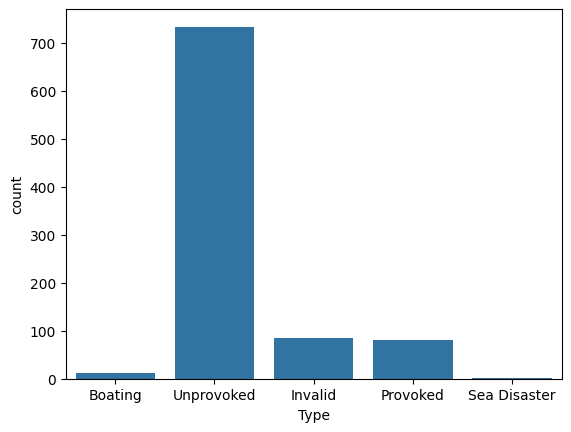

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Type", data=df)

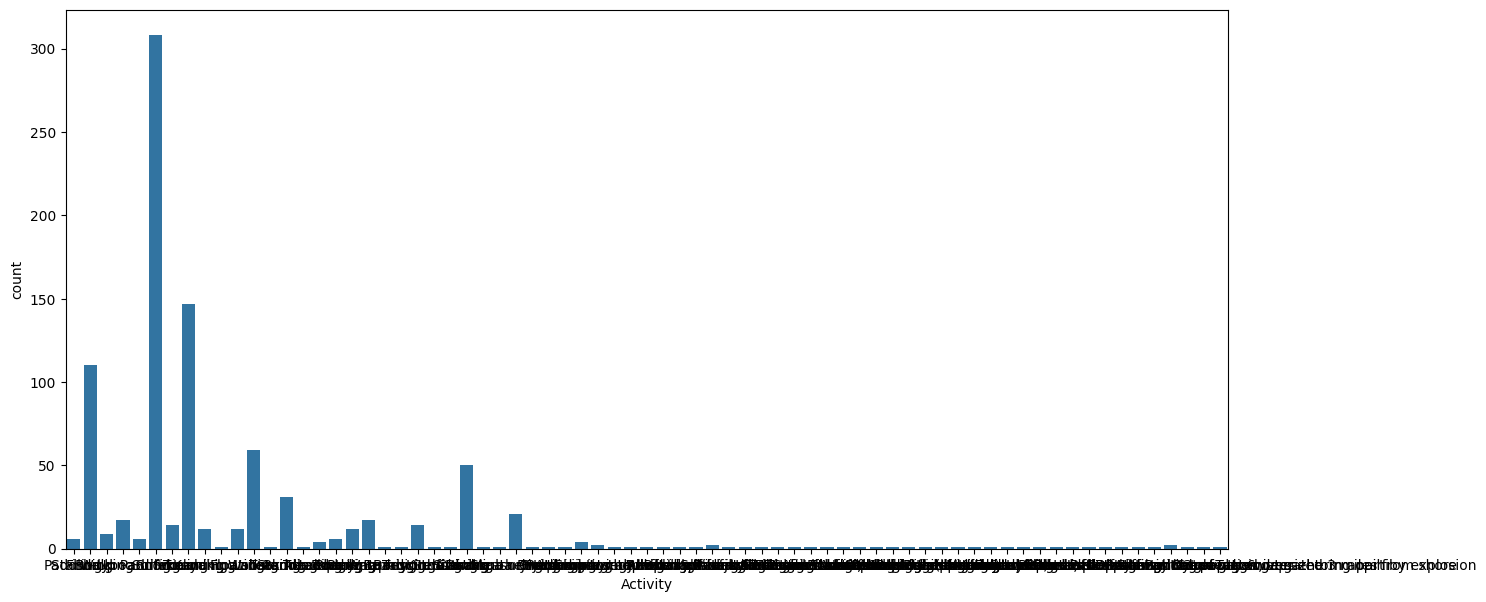

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(x="Activity", data=df)
plt.show()

In [ ]:
# Lista os "tipos" de idade
df["Age"].unique()

array(['57', '52', '15', '29', '25', '54', '40', '33', '18', '69', '13',
       '34', '10', '8', '50', '46', '14', '20', '28', '17', '19', '58',
       '36', '60s', '51', '22', '21', '43', '61', '59', '42', '6', '27',
       '48', '23', '26', '71', '9', '32', '44', '12', '35', '31', '38',
       '39', '68', '16', '11', '63', '70', '53', '7', '20s', 'Teen', '37',
       '30', '45', '47', '60', '55', '56', '41', '49', '66', '24', '30s',
       '8 or 10', 'Â\xa0', '6Ë\x9d', '73', '23 & 20', '5', '62', "60's",
       '67', '77', 'adult', '37, 67, 35, 27,  ? & 27'], dtype=object)

In [ ]:
# Normaliza campo de idade
df["Age"] = df["Age"].replace({
    "Teen": "18",
    "adult": "25",
    "\xa0 ": "23",
    "6½": "21",
    "30s": "30",
    "60s": "60",
    "60's": "60",
    "20s": "20",
    "40s": "40",
    "8 or 10": "10",
    "Â\xa0": "23",
    "6Ë\x9d": "23",
    "37, 67, 35, 27,  ? & 27": "27",
    "23 & 20": "23"
})

df["Age"] = df["Age"].astype("int64")

In [ ]:
# Lista os gêneros
df["Sex"].value_counts()

,count
Sex,
M,753
F,159
lli,1


In [ ]:
# Formata os registros diferentes de M ou F para = F
df["Sex"] = df["Sex"].apply(lambda x: x if x in ['M', 'F'] else 'F')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 0 to 6226
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      913 non-null    object
 1   Activity  913 non-null    object
 2   Sex       913 non-null    object
 3   Age       913 non-null    int64 
 4   Species   913 non-null    object
 5   Fatal     913 non-null    object
dtypes: int64(1), object(5)
memory usage: 49.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

def label_encoder(df, cols, print_classes=False):
    # Inicializa um objeto LabelEncoder
    le = LabelEncoder()

    for col in cols:
        # Aplica o fit e transformações em uma única etapa
        df[col] = le.fit_transform(df[col])

        label_encoders[col] = le

        # Opcionalmente imprime as classes para cada coluna
        if print_classes:
            print(f"{col}: {le.classes_}")

    return df

# Lista de colunas para codificar
cols = ["Type", "Activity", "Sex", "Species", "Fatal"]

# Aplica a codificação de rótulos no DataFrame
df = label_encoder(df, cols, print_classes=True)

Type: ['Boating' 'Invalid' 'Provoked' 'Sea Disaster' 'Unprovoked']
Activity: ['"Riding waves on a board"'
 'Adrift after the sinking of the motor yacht Princess Dianne'
 'Adrift in a life jacket'
 "Adrift, hanging onto cushion, after his 17' skiff ran out of gas & capsized 3 miles from shore"
 'Attempting to illegally enter the USA' 'Attempting to rescue a shark'
 'Attempting to swim across the Atlantic Ocean' 'Bathing' 'Boat capsized?'
 'Body Surfing' 'Bodyboarding' 'Boogie Boarding' 'Casting a net'
 'Clamming' 'Collecting fish from net' 'Crabbing (spearing crabs)'
 'Crawling' 'Diving' 'Fell overboard, prop slashed arm'
 "Filming 5' blue shark" 'Fishing' 'Floating'
 'Holding onto an inflatable boat'
 'Holding shark on leader & dangling it above the water'
 'Hunting crayfish' 'Jet Skiing' 'Jumped into the water'
 'Jumped off rocks into white water' 'Jumping' 'Kayaking'
 'Killing a shark' 'Kiteboarding' 'Lobstering' 'Lying on surfboard'
 "Lying prone in 2' of water" 'Measuring sharks'
 

In [ ]:
X = df.drop("Fatal", axis=1)
y = df["Fatal"]

In [ ]:
y.value_counts()

,count
Fatal,
0,739
1,174


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7759562841530054

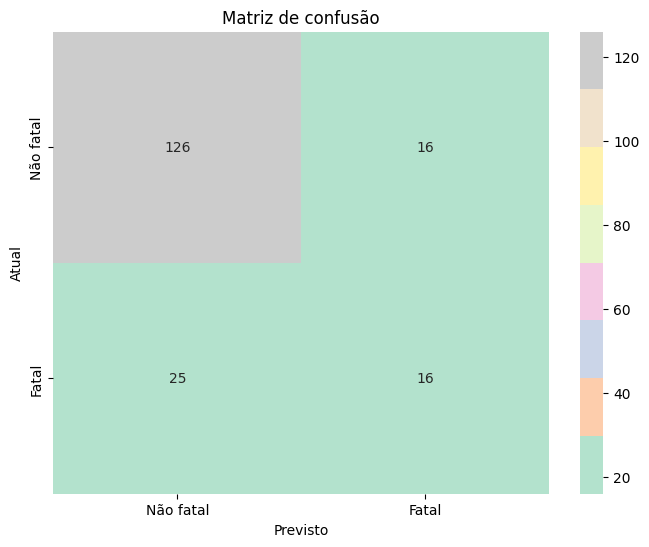

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

actual_labels = ['Não fatal', 'Fatal']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt=".0f",
    cmap="Pastel2",
    xticklabels=actual_labels,
    yticklabels=actual_labels
)
plt.xlabel("Previsto")
plt.ylabel("Atual")
plt.title("Matriz de confusão")
plt.show()

In [ ]:
plt.show()

pred_proba = rf.predict_proba(X_test)

fatal_class_index = 1
fatal_probabilities = pred_proba[:, fatal_class_index] * 100

for i, prob in enumerate(fatal_probabilities):
    print(f"Instância {i}: Probabilidade de ocorrência fatal = {prob:.2f}%")

Instância 0: Probabilidade de ocorrência fatal = 23.00%
Instância 1: Probabilidade de ocorrência fatal = 6.00%
Instância 2: Probabilidade de ocorrência fatal = 0.00%
Instância 3: Probabilidade de ocorrência fatal = 0.00%
Instância 4: Probabilidade de ocorrência fatal = 24.00%
Instância 5: Probabilidade de ocorrência fatal = 32.00%
Instância 6: Probabilidade de ocorrência fatal = 26.33%
Instância 7: Probabilidade de ocorrência fatal = 71.00%
Instância 8: Probabilidade de ocorrência fatal = 0.00%
Instância 9: Probabilidade de ocorrência fatal = 3.00%
Instância 10: Probabilidade de ocorrência fatal = 42.00%
Instância 11: Probabilidade de ocorrência fatal = 6.00%
Instância 12: Probabilidade de ocorrência fatal = 7.00%
Instância 13: Probabilidade de ocorrência fatal = 81.00%
Instância 14: Probabilidade de ocorrência fatal = 0.67%
Instância 15: Probabilidade de ocorrência fatal = 40.00%
Instância 16: Probabilidade de ocorrência fatal = 0.00%
Instância 17: Probabilidade de ocorrência fatal = 